# 【NLP 自然語言處理】文本前處理 - CKIP中文斷詞

In [4]:
import pandas as pd

dataset = pd.read_csv('./dataset/fb_post_02.csv')
dataset

,作者,讚數,時間,連結,貼文內容
0,鄭玉潔,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,最夢幻溫泉山莊藏身萬坪原始林中，僅18間客房都為獨棟小屋都有專屬戶外露天溫泉風呂泡湯賞雪同時...
1,跟著領隊玩,2,2024-04-27,https://www.facebook.com/groups/traveler168/po...,Google高達4.3顆星！顛覆你客家小吃的印象，北埔的客家桌菜，道道是經典，吃過的都說讚，...
2,Amy Lin,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,#板橋美食海鮮夠鮮美才敢清蒸！蒸天下蒸氣火鍋海鮮餐廳非常適合聚餐宴客，還有波士頓龍蝦可以品嘗...
3,宗韓,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,"藝綺地中海私廚餐酒館, 復古貴族風, 香煎特級牛排份量厚度都很威, 約會很推薦, 一起享受浪..."
4,謝露西,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,有人還沒跟上這波免簽的嗎??大概倒數一個月囉~~~(希望可以再延長啊啊啊啊!!!
...,...,...,...,...,...
995,Lucky hamburger ！,0,2024-03-22,https://www.facebook.com/groups/traveler168/po...,在地土城人～還沒吃過 Lucky 漢堡嗎？ 迫不及待趕快來吃看看吧～ 本月銷售月冠軍 熔...
996,Sinian Li,2,2024-03-22,https://www.facebook.com/groups/traveler168/po...,補財庫_招財小物一次看：『紫南宮』求發財金美食之旅_有拜有保庇_財富攏總來紫南宮：南投縣竹山...
997,任秋磊,0,2024-03-22,https://www.facebook.com/groups/traveler168/po...,超愛義大利羅馬假期義大利10日游全程4星級飯店無車購/無購物特別加碼贈送: 轉接插頭 / 行...
998,高樂天,4,2024-03-22,https://www.facebook.com/groups/traveler168/po...,原本隱身在北安橋下大腸包小腸，被檢舉才搬遷現址開啟實體店面「原北安橋下黑輪攤」。「原北安橋下...


實際上，有些社群貼文沒有內文（只有影音內容），因此會有空值的情況，可以將空值刪除。

In [6]:
dataset = dataset.dropna(subset = ['貼文內容'])

## 清除文本的特殊符號

原始的社群貼文不僅包含中、英文字，也夾帶各種標點符號或表情符號。這些非文字元素沒辦法直接分析，因此我們將其清除。
為了只保留原文的中、英文字，可以利用正規表達式幫我們篩選出文字的部分。

如下所示圖，只會保留文字的部分

In [5]:
import re

regex_pattern = r'[^\u4e00-\u9fffA-Za-z0-9\s]'

text = "新店報報!!!!!巷弄老宅寵物友善餐廳，獨特採用木炭直火料理早午餐餐點「島旅•brunch」。這間新開幕「島旅•brunch」是看格友分享才收入口袋名單"

cleaned_text = re.sub(regex_pattern, '', text)
cleaned_text

'新店報報巷弄老宅寵物友善餐廳獨特採用木炭直火料理早午餐餐點島旅brunch這間新開幕島旅brunch是看格友分享才收入口袋名單'

`r'[^\u4e00-\u9fffA-Za-z0-9\s]'`會匹配文本中所有不是中文字、英文字母、數字或空格的字符。在利用`re.sub(regex_pattern, '', text)`將符合條件的對象以空字串替換。

In [7]:
def process_text(_text):
    regex_pattern = r'[^\u4e00-\u9fffA-Za-z0-9\s]'
    cleaned_text = re.sub(regex_pattern, '', _text)

    cleaned_text = cleaned_text.lower()
    return cleaned_text


dataset['clean_text'] = dataset['貼文內容'].apply(process_text)
dataset

C:\Users\xcswapJohn\AppData\Local\Temp\ipykernel_21344\246393502.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['clean_text'] = dataset['貼文內容'].apply(process_text)


,作者,讚數,時間,連結,貼文內容,clean_text
0,鄭玉潔,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,最夢幻溫泉山莊藏身萬坪原始林中，僅18間客房都為獨棟小屋都有專屬戶外露天溫泉風呂泡湯賞雪同時...,最夢幻溫泉山莊藏身萬坪原始林中僅18間客房都為獨棟小屋都有專屬戶外露天溫泉風呂泡湯賞雪同時享...
1,跟著領隊玩,2,2024-04-27,https://www.facebook.com/groups/traveler168/po...,Google高達4.3顆星！顛覆你客家小吃的印象，北埔的客家桌菜，道道是經典，吃過的都說讚，...,google高達43顆星顛覆你客家小吃的印象北埔的客家桌菜道道是經典吃過的都說讚尤其胡椒鴨巷...
2,Amy Lin,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,#板橋美食海鮮夠鮮美才敢清蒸！蒸天下蒸氣火鍋海鮮餐廳非常適合聚餐宴客，還有波士頓龍蝦可以品嘗...,板橋美食海鮮夠鮮美才敢清蒸蒸天下蒸氣火鍋海鮮餐廳非常適合聚餐宴客還有波士頓龍蝦可以品嘗吃飽吃...
3,宗韓,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,"藝綺地中海私廚餐酒館, 復古貴族風, 香煎特級牛排份量厚度都很威, 約會很推薦, 一起享受浪...",藝綺地中海私廚餐酒館 復古貴族風 香煎特級牛排份量厚度都很威 約會很推薦 一起享受浪漫微醺之...
4,謝露西,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,有人還沒跟上這波免簽的嗎??大概倒數一個月囉~~~(希望可以再延長啊啊啊啊!!!,有人還沒跟上這波免簽的嗎大概倒數一個月囉希望可以再延長啊啊啊啊
...,...,...,...,...,...,...
994,跟著領隊玩,44,2024-03-21,https://www.facebook.com/groups/traveler168/po...,台東高CP值住宿台東首間無人自助服務旅店，平均1人只要315元！進房和退房只在彈指間，房間也...,台東高cp值住宿台東首間無人自助服務旅店平均1人只要315元進房和退房只在彈指間房間也是密碼...
995,Lucky hamburger ！,0,2024-03-22,https://www.facebook.com/groups/traveler168/po...,在地土城人～還沒吃過 Lucky 漢堡嗎？ 迫不及待趕快來吃看看吧～ 本月銷售月冠軍 熔...,在地土城人還沒吃過 lucky 漢堡嗎 迫不及待趕快來吃看看吧 本月銷售月冠軍 熔岩咔啦...
996,Sinian Li,2,2024-03-22,https://www.facebook.com/groups/traveler168/po...,補財庫_招財小物一次看：『紫南宮』求發財金美食之旅_有拜有保庇_財富攏總來紫南宮：南投縣竹山...,補財庫招財小物一次看紫南宮求發財金美食之旅有拜有保庇財富攏總來紫南宮南投縣竹山鎮社寮里大公街40號
997,任秋磊,0,2024-03-22,https://www.facebook.com/groups/traveler168/po...,超愛義大利羅馬假期義大利10日游全程4星級飯店無車購/無購物特別加碼贈送: 轉接插頭 / 行...,超愛義大利羅馬假期義大利10日游全程4星級飯店無車購無購物特別加碼贈送 轉接插頭 行李束帶...


## CKIP文本斷詞

官方提供了幾種安裝方式：[官方文檔]("https://github.com/ckiplab/ckiptagger")

- 標準安裝：`pip install -U ckiptagger[tf,gdown]`
- 最小安裝：`pip install -U ckiptagger`
- 完整安裝：`pip install -U ckiptagger[tfgpu,gdown]`

標準安裝的 `[tf,gdown]` 其實就是多安裝了 Tensorflow 及 gdown 兩個套件。gdown 是用來下載模型檔用的，但其實官方也有提供手動下載的載點，所以不是必要的。
但使用 CKIPtagger 需要 Tensorflow，所以在此階段下載如果沒下載，還是需要透過 `pip install tensorflow>=1.13.1`另外下載喔。

補充：`tfgpu` 是安裝 TensorFlow GPU 版本。

利用 `gdown` 下載模型檔。如果執行失敗，可以[手動下載]("https://drive.usercontent.google.com/download?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771")。（記得解壓縮）

In [ ]:
from ckiptagger import data_utils

data_utils.download_data_gdown("./")

從 `ckiptagger` 庫中導入了三個主要的模組：WS、POS 和 NER。分別對應於詞語分割、詞性標註和命名實體識別。並且將三個模型進行初始化。

In [12]:
from ckiptagger import WS, POS, NER

# 初始化模型
ws_driver = WS("./data") # 詞語分割
pos_driver = POS("./data") # 詞性標註
ner_driver = NER("./data") # 命名實體識別

c:\2_DataScience\04_Medium\nlp_textmining\venv\lib\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
c:\2_DataScience\04_Medium\nlp_textmining\venv\lib\site-packages\ckiptagger\model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
c:\2_DataScience\04_Medium\nlp_textmining\venv\lib\site-packages\ckiptagger\model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.

在自然語言處理（NLP）領域，詞性標註和斷詞是兩個重要的基礎，但為什麼非得經過這些處理過程？

斷詞（Word Segmentation）是將連續的文字句子切分成一個個獨立的詞語。若不先進行斷詞，會導致詞語理解的模糊，無法理解句子的內部結構。對於機器本身，句子會被視為一個完整的字符串，難以理解文本的意思。所以我們需要斷詞，在中文中，由於單詞之間沒有空格分隔（不同於英文），因此斷詞更是文本處理的首要步驟。

只要能理解斷詞的重要性，其實其他的應用都是相同的邏輯，詞性標註（Part-of-Speech Tagging，簡稱POS Tagging）可以為每個詞語分配其相應的詞性（如名詞、動詞、形容詞等）。對於機器而言，有助於語法分析及提高訊息抽取的準確性。

有了詞性標註，我們就可以跟斷詞一起應用。根據我們的分析需求，可以在斷詞後依據詞性進行篩選，例如：只保留名詞或排除特定詞性。
詳細可參考：[CKIP 詞性表]("https://github.com/ckiplab/ckiptagger/wiki/POS-Tags")

實際執行的步驟如下：
1. 進行詞性標註及斷詞
2. 過濾詞彙：只保留名詞或排除特定詞性

In [13]:
def word_segmentation(articles: list):
    # 進行詞性標註及斷詞
    ws_results = ws_driver(articles)
    pos_results = pos_driver(ws_results)

    # 過濾詞彙
    selected_words = []
    for sentence_ws, sentence_pos in zip(ws_results, pos_results):
        filtered_words = [
            word for word, pos in zip(sentence_ws, sentence_pos)
            # 斷詞後長度大於1的單詞
            # 保留詞性為名詞或動詞
            if len(word) > 1 and (pos.startswith('N') or pos.startswith('V'))
        ]
        selected_words.extend(filtered_words)

    return ' '.join(selected_words)

In [14]:
dataset['word_seg'] = dataset['clean_text'].apply(lambda content: word_segmentation([content]))
dataset

C:\Users\xcswapJohn\AppData\Local\Temp\ipykernel_21344\2899863902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['word_seg'] = dataset['clean_text'].apply(lambda content: word_segmentation([content]))


,作者,讚數,時間,連結,貼文內容,clean_text,word_seg
0,鄭玉潔,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,最夢幻溫泉山莊藏身萬坪原始林中，僅18間客房都為獨棟小屋都有專屬戶外露天溫泉風呂泡湯賞雪同時...,最夢幻溫泉山莊藏身萬坪原始林中僅18間客房都為獨棟小屋都有專屬戶外露天溫泉風呂泡湯賞雪同時享...,夢幻 溫泉 山莊 藏身 原始林 18 客房 小屋 專屬 戶外 露天 溫泉風呂 泡湯 同時 享...
1,跟著領隊玩,2,2024-04-27,https://www.facebook.com/groups/traveler168/po...,Google高達4.3顆星！顛覆你客家小吃的印象，北埔的客家桌菜，道道是經典，吃過的都說讚，...,google高達43顆星顛覆你客家小吃的印象北埔的客家桌菜道道是經典吃過的都說讚尤其胡椒鴨巷...,高達 43 顛覆 客家 小吃 印象 北埔 客家 桌菜 道道 經典 說讚 胡椒鴨 知道 高達 ...
2,Amy Lin,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,#板橋美食海鮮夠鮮美才敢清蒸！蒸天下蒸氣火鍋海鮮餐廳非常適合聚餐宴客，還有波士頓龍蝦可以品嘗...,板橋美食海鮮夠鮮美才敢清蒸蒸天下蒸氣火鍋海鮮餐廳非常適合聚餐宴客還有波士頓龍蝦可以品嘗吃飽吃...,板橋 美食 海鮮 鮮美 清蒸 天下 蒸氣 火鍋 海鮮 餐廳 適合 聚餐 宴客 波士頓 龍蝦 ...
3,宗韓,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,"藝綺地中海私廚餐酒館, 復古貴族風, 香煎特級牛排份量厚度都很威, 約會很推薦, 一起享受浪...",藝綺地中海私廚餐酒館 復古貴族風 香煎特級牛排份量厚度都很威 約會很推薦 一起享受浪漫微醺之...,藝綺 地中海 私廚餐 酒館 復古 貴族 香煎 牛排 份量 厚度 約會 推薦 享受 浪漫 微醺...
4,謝露西,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,有人還沒跟上這波免簽的嗎??大概倒數一個月囉~~~(希望可以再延長啊啊啊啊!!!,有人還沒跟上這波免簽的嗎大概倒數一個月囉希望可以再延長啊啊啊啊,跟上 倒數 希望 延長
...,...,...,...,...,...,...,...
994,跟著領隊玩,44,2024-03-21,https://www.facebook.com/groups/traveler168/po...,台東高CP值住宿台東首間無人自助服務旅店，平均1人只要315元！進房和退房只在彈指間，房間也...,台東高cp值住宿台東首間無人自助服務旅店平均1人只要315元進房和退房只在彈指間房間也是密碼...,台東 cp值 住宿 台東 自助 服務 旅店 平均 315 退房 彈指 房間 密碼鎖 鑰匙 旁...
995,Lucky hamburger ！,0,2024-03-22,https://www.facebook.com/groups/traveler168/po...,在地土城人～還沒吃過 Lucky 漢堡嗎？ 迫不及待趕快來吃看看吧～ 本月銷售月冠軍 熔...,在地土城人還沒吃過 lucky 漢堡嗎 迫不及待趕快來吃看看吧 本月銷售月冠軍 熔岩咔啦...,地土城人 漢堡 吧 銷售月 冠軍 熔岩 咔啦堡 漢堡 主打 酥脆 現炸 食材 飽滿 不馬虎...
996,Sinian Li,2,2024-03-22,https://www.facebook.com/groups/traveler168/po...,補財庫_招財小物一次看：『紫南宮』求發財金美食之旅_有拜有保庇_財富攏總來紫南宮：南投縣竹山...,補財庫招財小物一次看紫南宮求發財金美食之旅有拜有保庇財富攏總來紫南宮南投縣竹山鎮社寮里大公街40號,補財庫 招財 小物 紫南宮 財金 美食 保庇 財富 紫南宮 南投縣 竹山鎮 社寮 里大公街 40號
997,任秋磊,0,2024-03-22,https://www.facebook.com/groups/traveler168/po...,超愛義大利羅馬假期義大利10日游全程4星級飯店無車購/無購物特別加碼贈送: 轉接插頭 / 行...,超愛義大利羅馬假期義大利10日游全程4星級飯店無車購無購物特別加碼贈送 轉接插頭 行李束帶...,超愛 義大利 羅馬 假期 義大利 10日 4星級 飯店 購物 特別 加碼 贈送 轉接 插頭 ...


## 優化斷詞任務

### 建立自定義詞典

透過建立自定義辭典，我們可以將領域內的專有名詞（人名、地名、組織、日期）給識別出來，告訴模型哪些詞彙是必須強制分詞。
例如「紅氣球獨立書店」，如果利用一般斷詞的方法，會得到「紅氣球、獨立、書店」的結果。如果我們把這個詞紀錄到辭典裡，就可以提醒模型這個詞必須一起斷，輸出就會是「紅氣球獨立書店」。

當然，手動加入專有名詞到辭典裡，要耗費很多時間。我們可以利用命名實體識別來標記出文本內的專有名詞，接著輸出到辭典裡便可快速建立自定義辭典。

In [36]:
text = "台北信義區文青新地標，純白獨棟玻璃屋建築「吉祥道」，複合式經營達永建設建案、紅氣球獨立書店、萬秀洗衣店、COFFEE LAW萬秀樓頂店、選物店，台北網美景點，捷運市府站美食景點，台北旅遊好好玩。來去玩：https://upssmile.com/215856/ji-xiang-dao吉祥道Jíxiáng dào。電話：無。地址：110台北市信義區基隆路一段89號（白色建築）。營業時間：週一至週四 11:00-20:00。週五至週日 11:00-21:00。"

ws = ws_driver([text])
entities = ner_driver(ws, pos_driver(ws))

print(entities)

[{(52, 67, 'PRODUCT', 'COFFEE LAW萬秀樓頂店'), (89, 91, 'GPE', '台北'), (46, 51, 'ORG', '萬秀洗衣店'), (79, 84, 'FAC', '捷運市府站'), (170, 173, 'GPE', '信義區'), (0, 5, 'LOC', '台北信義區'), (21, 24, 'FAC', '吉祥道'), (193, 210, 'TIME', '週一至週四 11:00-20:00'), (31, 34, 'GPE', '達永建'), (167, 170, 'GPE', '台北市'), (38, 45, 'ORG', '紅氣球獨立書店'), (211, 228, 'TIME', '週五至週日 11:00-21:00'), (72, 74, 'GPE', '台北'), (164, 167, 'CARDINAL', '110'), (173, 181, 'LOC', '基隆路一段89號'), (68, 71, 'FAC', '選物店')}]


自定義詞典的格式，以 json 結構表示。每個鍵是字詞，對應的值則為權重。權重的數值是相對的，權重值越高，該詞彙越被優先考慮作為一個整體字詞。

把命名實體識別後的輸出結果，轉換成字典的形式。由於沒有設定斷詞順序的需求，權重值就全先設成1。

In [37]:
expanded_entities = [item for sublist in entities for item in sublist]

entity_dict = {}
for _, _, _, name in expanded_entities:
    entity_dict[name] = 1

entity_dict

{'COFFEE LAW萬秀樓頂店': 1,
 '台北': 1,
 '萬秀洗衣店': 1,
 '捷運市府站': 1,
 '信義區': 1,
 '台北信義區': 1,
 '吉祥道': 1,
 '週一至週四 11:00-20:00': 1,
 '達永建': 1,
 '台北市': 1,
 '紅氣球獨立書店': 1,
 '週五至週日 11:00-21:00': 1,
 '110': 1,
 '基隆路一段89號': 1,
 '選物店': 1}

對所有貼文內容做同樣的事情，最後輸出成完整的詞典。

In [40]:
entity_dict = {}
for content in dataset['貼文內容'].values:
    ws = ws_driver([content])
    entities = ner_driver(ws, pos_driver(ws))

    expanded_entities = [item for sublist in entities for item in sublist]
    for _, _, _, name in expanded_entities:
        entity_dict[name] = 1

entity_dict

{'4': 1,
 '18': 1,
 '溫泉風呂': 1,
 '夢幻溫泉山莊': 1,
 '萬坪': 1,
 '北埔': 1,
 '4.3': 1,
 'Google': 1,
 '新北市': 1,
 '波士頓': 1,
 '板橋': 1,
 '板橋區': 1,
 '漢生東路': 1,
 '萬大路183號1 樓': 1,
 '地中海私廚餐酒館店址': 1,
 '一個月': 1,
 '迪': 1,
 '舒适': 1,
 '上週末': 1,
 '正濱漁港': 1,
 '基隆': 1,
 '週末': 1,
 '一': 1,
 '88': 1,
 '台北市中心': 1,
 '一天': 1,
 '基隆正濱漁港': 1,
 '內湖區': 1,
 '虎加達': 1,
 '十日': 1,
 '四天': 1,
 '台北市': 1,
 '埃及尼羅河': 1,
 '尼羅河': 1,
 '8/25': 1,
 '8/4': 1,
 '900': 1,
 '7/31': 1,
 '8/18': 1,
 '內湖路': 1,
 '康孟波': 1,
 '7/14': 1,
 '59': 1,
 '10/16五月底': 1,
 '王群元': 1,
 '國際旅行社股份有限公司': 1,
 '墨爾本': 1,
 '澳洲': 1,
 '這天': 1,
 '第4天': 1,
 '維多利亞': 1,
 '四': 1,
 '２': 1,
 '6566': 1,
 '中壢': 1,
 '10:00-20:00': 1,
 '週二': 1,
 '桃園': 1,
 '桃園植栽森林系餐廳': 1,
 '早午餐咖啡廳': 1,
 '中壢交流道美食餐廳': 1,
 '03': 1,
 '22號': 1,
 '桃園平鎮': 1,
 '環南路': 1,
 '桃園市平鎮區': 1,
 '桃園咖啡廳': 1,
 '樂天': 1,
 '第一': 1,
 '格友': 1,
 '高樂天': 1,
 '台南': 1,
 '今天': 1,
 '島旅•brunch': 1,
 '新店報報': 1,
 '樂天小高': 1,
 '日式': 1,
 '冬天': 1,
 '百萬': 1,
 '新北市五股': 1,
 '白天夜晚': 1,
 '觀音山': 1,
 '母親節': 1,
 '50元': 1,
 '四月份': 1,
 '一小時': 1,
 

轉存成 JSON 檔

In [41]:
import json

with open('./asset/custom_dict.json', 'w', encoding='utf-8') as json_file:
    json.dump(entity_dict, json_file, ensure_ascii = False, indent = 4)

### 建立停用詞庫

日常的中文語境下，常會有一些無意義的詞（語助詞、代名詞、連接詞…等），文本中常會出現像「我們」、「此時」、「喔」、「吧」…等各別來看不具意義的詞彙。
停用詞庫以 TXT 檔儲存即可，每個詞代表一行。只要是儲存在停用詞庫內的詞，不會出現在斷詞結果中。

💡補充：代名詞在有些分析場景中是重要的。
通常會利用指代消解（Coreference Resolution），來識別和解析文本中代名詞及其所指代的實體，機器可以理解「他」、「你」… 等所意指的對象。
不過此文不會繼續深入探討其他方法，有興趣可以另外深入研究。

### 結合自定義詞典與停用詞庫

分別讀取自定義詞典檔案及停用詞庫後各別處理：
- 自定義詞典：`construct_dictionary` 將字典轉換成 CKIPtagger 的辭典格式
- 停用詞庫：利用 `splitlines` 按行分割成列表

In [90]:
from ckiptagger import construct_dictionary
import json

# 讀取自定義詞典檔案，強制分詞，避免斷詞的誤差
with open('./asset/custom_dict.json', 'r', encoding = 'utf-8') as json_file:
    word_to_weight = json.load(json_file)
dictionary = construct_dictionary(word_to_weight)

# 讀取停用詞庫
with open('./asset/stop_words.txt', 'r', encoding = 'utf-8') as f:
    stop_word = f.read().splitlines()


def word_segmentation(articles: list):
    # 進行詞性標註及斷詞
    ws_results = ws_driver(articles, coerce_dictionary = dictionary)
    pos_results = pos_driver(ws_results)

    selected_words = []
    for sentence_ws, sentence_pos in zip(ws_results, pos_results):
        filtered_words = [
            word for word, pos in zip(sentence_ws, sentence_pos)
            # 斷詞後長度大於1的單詞
            # 排除掉數字
            # 保留詞性為名詞或動詞
            # 排除停用詞庫內的詞，將列表轉換為集合來去檢索停用詞庫的內容
            if len(word) > 1 and not word.isdigit() and (pos.startswith('N') or pos.startswith('V')) and word not in set(stop_word)
        ]
        selected_words.extend(filtered_words)

    return ' '.join(selected_words)

In [91]:
dataset['word_seg'] = dataset['clean_text'].apply(lambda content: word_segmentation([content]))
dataset

C:\Users\xcswapJohn\AppData\Local\Temp\ipykernel_21344\2899863902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['word_seg'] = dataset['clean_text'].apply(lambda content: word_segmentation([content]))


,作者,讚數,時間,連結,貼文內容,clean_text,word_seg
0,鄭玉潔,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,最夢幻溫泉山莊藏身萬坪原始林中，僅18間客房都為獨棟小屋都有專屬戶外露天溫泉風呂泡湯賞雪同時...,最夢幻溫泉山莊藏身萬坪原始林中僅18間客房都為獨棟小屋都有專屬戶外露天溫泉風呂泡湯賞雪同時享...,夢幻溫泉山莊 藏身 原始 客房 小屋 專屬 戶外 露天 溫泉風呂 綠意 圍繞 私人 露天 浴...
1,跟著領隊玩,2,2024-04-27,https://www.facebook.com/groups/traveler168/po...,Google高達4.3顆星！顛覆你客家小吃的印象，北埔的客家桌菜，道道是經典，吃過的都說讚，...,google高達43顆星顛覆你客家小吃的印象北埔的客家桌菜道道是經典吃過的都說讚尤其胡椒鴨巷...,顛覆 客家 小吃 印象 北埔 客家 桌菜 道道 經典 說讚 胡椒鴨 閱讀
2,Amy Lin,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,#板橋美食海鮮夠鮮美才敢清蒸！蒸天下蒸氣火鍋海鮮餐廳非常適合聚餐宴客，還有波士頓龍蝦可以品嘗...,板橋美食海鮮夠鮮美才敢清蒸蒸天下蒸氣火鍋海鮮餐廳非常適合聚餐宴客還有波士頓龍蝦可以品嘗吃飽吃...,板橋 美食 海鮮 鮮美 清蒸 蒸氣 火鍋 海鮮 餐廳 聚餐 宴客 波士頓 龍蝦 品嘗 吃飽 ...
3,宗韓,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,"藝綺地中海私廚餐酒館, 復古貴族風, 香煎特級牛排份量厚度都很威, 約會很推薦, 一起享受浪...",藝綺地中海私廚餐酒館 復古貴族風 香煎特級牛排份量厚度都很威 約會很推薦 一起享受浪漫微醺之...,藝綺 地中海 私廚餐 酒館 復古 貴族 香煎 牛排 份量 厚度 約會 推薦 浪漫 微醺 藝綺...
4,謝露西,0,2024-04-27,https://www.facebook.com/groups/traveler168/po...,有人還沒跟上這波免簽的嗎??大概倒數一個月囉~~~(希望可以再延長啊啊啊啊!!!,有人還沒跟上這波免簽的嗎大概倒數一個月囉希望可以再延長啊啊啊啊,倒數 一個月 延長
...,...,...,...,...,...,...,...
994,跟著領隊玩,44,2024-03-21,https://www.facebook.com/groups/traveler168/po...,台東高CP值住宿台東首間無人自助服務旅店，平均1人只要315元！進房和退房只在彈指間，房間也...,台東高cp值住宿台東首間無人自助服務旅店平均1人只要315元進房和退房只在彈指間房間也是密碼...,台東 cp值 住宿 台東 自助 旅店 平均 退房 彈指 房間 密碼鎖 鑰匙 旁邊 超熱鬧 鐵...
995,Lucky hamburger ！,0,2024-03-22,https://www.facebook.com/groups/traveler168/po...,在地土城人～還沒吃過 Lucky 漢堡嗎？ 迫不及待趕快來吃看看吧～ 本月銷售月冠軍 熔...,在地土城人還沒吃過 lucky 漢堡嗎 迫不及待趕快來吃看看吧 本月銷售月冠軍 熔岩咔啦...,地土城人 漢堡 吧 本月 銷售月 冠軍 熔岩 堡漢堡 主打 酥脆 現炸 食材 飽滿 不馬虎...
996,Sinian Li,2,2024-03-22,https://www.facebook.com/groups/traveler168/po...,補財庫_招財小物一次看：『紫南宮』求發財金美食之旅_有拜有保庇_財富攏總來紫南宮：南投縣竹山...,補財庫招財小物一次看紫南宮求發財金美食之旅有拜有保庇財富攏總來紫南宮南投縣竹山鎮社寮里大公街40號,補財庫 招財 小物 紫南宮 美食 保庇 財富 紫南宮 南投縣竹山鎮 社寮 里大公街 40號
997,任秋磊,0,2024-03-22,https://www.facebook.com/groups/traveler168/po...,超愛義大利羅馬假期義大利10日游全程4星級飯店無車購/無購物特別加碼贈送: 轉接插頭 / 行...,超愛義大利羅馬假期義大利10日游全程4星級飯店無車購無購物特別加碼贈送 轉接插頭 行李束帶...,超愛 義大利羅馬 假期 義大利 10日 4星級 飯店 無購物 加碼 贈送 轉接 插頭 李束帶...


In [101]:
dataset.to_csv('./dataset/fb_post_seg.csv', index = False)

## 文字雲

In [ ]:
# pip3 install matplotlib wordcloud

In [93]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

In [94]:
# 從資料集中提取所有斷詞後的詞語
all_post_word = [word for sentence in dataset['word_seg'].values for word in sentence.split(" ")]

# 計算每個字詞的出現次數，轉換成字典（鍵是元素，值是元素出現的次數）
dictionary = Counter(all_post_word)

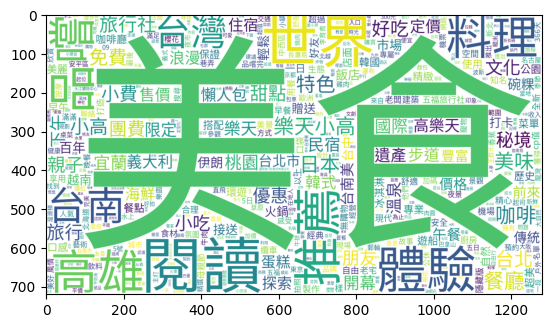

In [95]:
TC_FONT_PATH = 'asset/font/NotoSansTC-Regular.otf' # 繁體中文字型檔名

wc = WordCloud(background_color = 'white',
               margin = 2, # 文字間距
               font_path = TC_FONT_PATH, # 字體
               max_words = 500, # 文字數量
               width = 1280, 
               height = 720)
                         

wc.generate_from_frequencies(dictionary)
plt.imshow(wc)